In [1]:
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
import astropy
from astropy import units
import clmm.dataops as da
import clmm.galaxycluster as gc
import clmm.theory as theory
from clmm import Cosmology
from clmm import support
from clmm.support import mock_data as mock
from clmm.support import sampler
from clmm.support.sampler import *
from clmm.support.sampler import fitters
import random
from scipy.interpolate import interp1d
import masterproject_functions as fc

plt.rcParams['font.family']=['gothambook','gotham','gotham-book','serif']

clmm.__version__



'0.9.3'

In [2]:
np.random.seed(22)

In [3]:
#set the cosmology
cosmo = Cosmology(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)


In [5]:

np.set_printoptions(precision=3)
#numbers of clusters you want to create
num=100
#setting parameters for the clusters
cl_mass = fc.massfunction(num,13,15) #mass
logm = np.log(cl_mass)/np.log(10) #logarithmic mass
cl_ra=np.zeros(num)#right ascention 
cl_dec=np.zeros(num)#declination
cl_z = np.random.uniform(0.1,0.6,num)#redshift
cl_c=np.exp(abs(np.log(4) + 0.1*np.random.randn(num)))
#5.72/((1+cl_z)**0.71)*(cl_z/10.e14)**(-0.081)#concentration
cl_ngals=np.random.randint(50,10000,num) #numbers of galaxies in each cluster
#finished cluster data in a dictionary
cluster_data ={'m':cl_mass,
               'logm':logm,
               'ra':cl_ra,
               'dec':cl_dec,
               'z':cl_z,
               'c':cl_c,
               'ngals': cl_ngals}



Text(0, 0.5, '$c_{\\rm 200c}$')

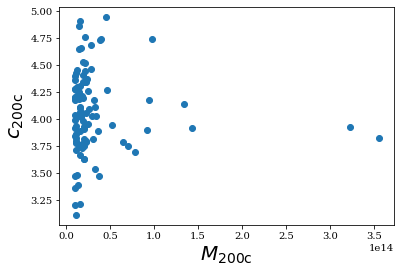

In [6]:
plt.scatter(cluster_data['m'],cluster_data['c'])
plt.xlabel(r'$M_{\rm 200c}$', fontsize = 20)
plt.ylabel(r'$c_{\rm 200c}$', fontsize = 20)

In [8]:
#Generate a mock dataset
noisy_data = []
ideal_data = []
#for loop
for k in range (num):
    
    #Generate a mock dataset of sheared background galaxies with shapenoise and photoz
    noisy_data.append(mock.generate_galaxy_catalog(cluster_data['m'][k], 
                                              cluster_data['z'][k], 
                                              cluster_data['c'][k], 
                                                             cosmo, 
                                                         'chang13', 
                             zsrc_min = cluster_data['z'][k] + 0.1,
                                                   shapenoise=0.05, 
                                        photoz_sigma_unscaled=0.05, 
                                    ngals=cluster_data['ngals'][k])) 

    #Generate a mock dataset of sheared background galaxies without shapenoise and photoz
    ideal_data.append(mock.generate_galaxy_catalog(cluster_data['m'][k],
                                              cluster_data['z'][k], 
                                              cluster_data['c'][k],
                                                             cosmo,
                                                         'chang13',
                             zsrc_min = cluster_data['z'][k] + 0.1, 
                             ngals = int(cluster_data['ngals'][k])))
                           


/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_l

/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_l

/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_l

In [9]:

gc_object =[]
for k in range(num):

    cluster_id = "CL_ideal"
    gc_object.append( clmm.GalaxyCluster(cluster_id, 
                                 cluster_data['ra'][k],
                                 cluster_data['dec'][k],
                                 cluster_data['z'][k], 
                                     ideal_data[k]))
    gc_object[k].save('ideal_GC_'+str(k)+'.pkl')

gc_object =[]

for k in range(num):

    cluster_id = "CL_noisy"
    gc_object.append( clmm.GalaxyCluster(cluster_id,
                                 cluster_data['ra'][k],
                                 cluster_data['dec'][k],
                                 cluster_data['z'][k], 
                                     noisy_data[k]))
    gc_object[k].save('noisy_GC_'+str(k)+'.pkl')



In [10]:
#same question as one cell above
cl_ideal = []
cl_noisy = []
for k in range(num):
    cl_ideal.append (clmm.GalaxyCluster.load('ideal_GC_'+str(k)+'.pkl'))
    cl_noisy.append (clmm.GalaxyCluster.load('noisy_GC_'+str(k)+'.pkl'))

(0.0, 5.0)

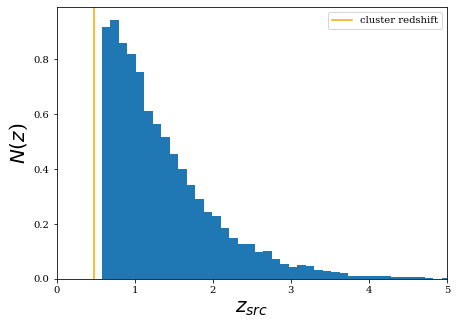

In [11]:
k=0
plt.figure(figsize=(7,5))
plt.hist(cl_ideal[k].galcat['z'], density = True, bins = 50)
plt.axvline(x = cluster_data['z'][k], color='orange', label = 'cluster redshift')
plt.xlabel(r'$z_{src}$', fontsize = 20)
plt.ylabel(r'$N(z$)', fontsize = 20)
plt.legend()
plt.xlim(0,5)

In [12]:
for k in range(num):
    cl_ideal[k].compute_tangential_and_cross_components(geometry="flat")
    cl_noisy[k].compute_tangential_and_cross_components(geometry="flat")


In [13]:
bin_edges = da.make_bins(0.2, 4, 15, method='evenlog10width')


In [14]:
for k in range(num):
    cl_ideal[k].make_radial_profile("Mpc", bins=bin_edges, cosmo=cosmo, gal_ids_in_bins=True)
    cl_noisy[k].make_radial_profile("Mpc", bins=bin_edges, cosmo=cosmo, gal_ids_in_bins=True)



In [15]:

gt_model_ideal_singlez = []
gt_model_ideal_zdistrib = []
gt_model_noisy_singlez = []
gt_model_noisy_zdistrib = []
r_id=[]
r_no=[]
for k in range(num):

    r_id.append(cl_ideal[k].profile['radius'])
    r_no.append(cl_noisy[k].profile['radius'])
   

    gt_model_ideal_singlez.append(fc.model_reduced_tangential_shear_singlez(r_id[k], 
                                                           cluster_data['logm'][k],
                                                          cl_ideal[k].profile['z'],
                                                              cluster_data['z'][k],
                                                              cluster_data['c'][k],cosmo))
    
    gt_model_ideal_zdistrib.append(fc.model_reduced_tangential_shear_zdistrib(r_id[k],
                                                             cluster_data['logm'][k],
                                                                  ideal_data[k],
                                                                    cl_ideal[k], 
                                                            cl_ideal[k].profile,
                                                             cluster_data['z'][k], 
                                                            cluster_data['c'][k],cosmo))
    
    gt_model_noisy_singlez.append(fc.model_reduced_tangential_shear_singlez(r_no[k], 
                                                           cluster_data['logm'][k],
                                                          cl_noisy[k].profile['z'],
                                                              cluster_data['z'][k],
                                                              cluster_data['c'][k],cosmo))
    
    gt_model_noisy_zdistrib.append(fc.model_reduced_tangential_shear_zdistrib(r_no[k],
                                                             cluster_data['logm'][k],
                                                                  noisy_data[k],
                                                                    cl_noisy[k], 
                                                            cl_noisy[k].profile,
                                                             cluster_data['z'][k], 
                                                            cluster_data['c'][k],cosmo))


/Users/nicomasii/opt/anaconda3/envs/clmm/lib/python3.9/site-packages/clmm-0.9.3-py3.9.egg/clmm/theory/func_layer.py:416: UserWarning: Some source redshifts are lower than the cluster redshift. shear = 0 for those galaxies.


In [16]:
#ab hier gucken

m_est_ideal_zdistrib = [None]*num
m_est_err_ideal_zdistrib = [None]*num
for k in range(num):

    func = lambda r, x : fc.model_reduced_tangential_shear_zdistrib(r,x, 
                                                       ideal_data[k],
                                                         cl_ideal[k], 
                                                 cl_ideal[k].profile, 
                                                  cluster_data['z'][k], 
                                                  cluster_data['c'][k],cosmo)

    popt,pcov = fitters['curve_fit'](func, 
                        cl_ideal[k].profile['radius'], 
                        cl_ideal[k].profile['gt'], 
                        cl_ideal[k].profile['gt_err'], bounds=[10.,17.])#p0 war bei 14.6 habe ich gelöscht

    
    m_est_ideal_zdistrib[k] = 10.**popt[0]
    m_est_err_ideal_zdistrib[k] =  m_est_ideal_zdistrib[k] * np.sqrt(pcov[0][0]) * np.log(10) 
   
        


In [17]:
m_est_ideal_singlez = [None]*num
m_est_err_ideal_singlez = [None]*num
for k in range(num):

    funct = lambda r, logm : fc.model_reduced_tangential_shear_singlez(r,
                                                                 logm, 
                                             cl_ideal[k].profile['z'], 
                                                   cluster_data['z'][k], 
                                                  cluster_data['c'][k],cosmo)
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_ideal[k].profile['radius'], 
                        cl_ideal[k].profile['gt'], 
                        cl_ideal[k].profile['gt_err'], bounds=[10.,17.])

    m_est_ideal_singlez[k] = 10.**popt[0]
    m_est_err_ideal_singlez[k] = m_est_ideal_singlez[k] * np.sqrt(pcov[0][0]) * np.log(10)



In [18]:
m_est_noisy_zdistrib = [None]*num
m_est_err_noisy_zdistrib = [None]*num
for k in range(num):
    
    funct = lambda r, logm : fc.model_reduced_tangential_shear_zdistrib(r, 
                                                                  logm, 
                                                         noisy_data[k],
                                                           cl_noisy[k], 
                                                   cl_noisy[k].profile, 
                                                    cluster_data['z'][k], 
                                                  cluster_data['c'][k],cosmo) 
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_noisy[k].profile['radius'], 
                        cl_noisy[k].profile['gt'], 
                        cl_noisy[k].profile['gt_err'], bounds=[10.,16.])

    m_est_noisy_zdistrib[k] = 10.**popt[0]
    m_est_err_noisy_zdistrib[k] =  m_est_noisy_zdistrib[k] * np.sqrt(pcov[0][0]) * np.log(10) 



In [19]:
m_est_noisy_singlez = [None]*num
m_est_err_noisy_singlez =[None]*num
for k in range(num):

    funct = lambda r, logm : fc.model_reduced_tangential_shear_singlez(r, 
                                                                 logm, 
                                             cl_noisy[k].profile['z'],
                                                   cluster_data['z'][k], 
                                                  cluster_data['c'][k],cosmo)
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_noisy[k].profile['radius'], 
                        cl_noisy[k].profile['gt'], 
                        cl_noisy[k].profile['gt_err'],bounds=[10.,16.])

    m_est_noisy_singlez[k] = 10**popt[0]
    m_est_err_noisy_singlez[k] =  m_est_noisy_singlez[k] * np.sqrt(pcov[0][0])*np.log(10)
    m_est_err_noisy_singlez_lg = np.sqrt(pcov[0][0])



In [20]:
gt_est_ideal_zdistrib = []
gt_est_noisy_zdistrib = []
gt_est_ideal_singlez = []
gt_est_noisy_singlez = []

for k in range(num):

    gt_est_ideal_zdistrib.append(fc.model_reduced_tangential_shear_zdistrib
                                            (r_id[k],
                                np.log(m_est_ideal_zdistrib[k])/np.log(10), 
                                                             ideal_data[k], 
                                                               cl_ideal[k], 
                                                       cl_ideal[k].profile, 
                                                      cluster_data['z'][k], 
                                                      cluster_data['c'][k],
                                                                    cosmo))

    gt_est_noisy_zdistrib.append(fc.model_reduced_tangential_shear_zdistrib
                                            (r_no[k], 
                                np.log(m_est_noisy_zdistrib[k])/np.log(10), 
                                                             noisy_data[k], 
                                                               cl_noisy[k], 
                                                       cl_noisy[k].profile,
                                                      cluster_data['z'][k], 
                                                      cluster_data['c'][k],
                                                                    cosmo))

    gt_est_ideal_singlez.append(fc.model_reduced_tangential_shear_singlez
                                           (r_id[k], 
                                np.log(m_est_ideal_singlez[k])/np.log(10),
                                                 cl_ideal[k].profile['z'],
                                                     cluster_data['z'][k], 
                                                     cluster_data['c'][k],
                                                                   cosmo))
    
    gt_est_noisy_singlez.append(fc.model_reduced_tangential_shear_singlez
                                           (r_no[k],
                                np.log(m_est_noisy_singlez[k])/np.log(10),
                                                 cl_noisy[k].profile['z'],
                                                     cluster_data['z'][k], 
                                                     cluster_data['c'][k],
                                                                   cosmo))


In [21]:
#Visualization of the results
#For visualization purpose, we calculate the reduced tangential shear predicted by the model with estimated masses for noisy and ideal data.

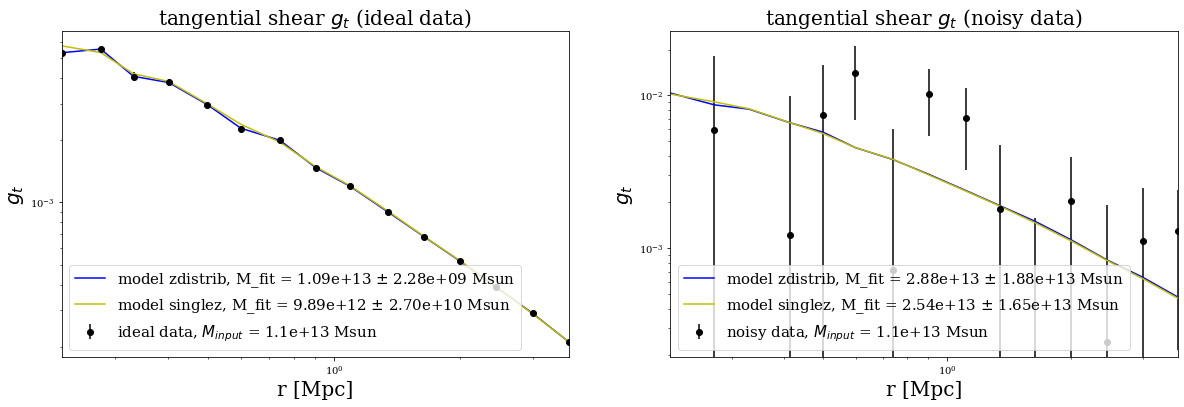

In [22]:
k=10
plt.figure(figsize=( 20 , 6 ))
plt.subplot( 1 , 2 , 1 )
plt.title(r'tangential shear $g_t$ (ideal data)', fontsize=20)
plt.errorbar(r_id[k],cl_ideal[k].profile['gt'],cl_ideal[k].profile['gt_err'],c='k',linestyle='', 
             marker='o', label=r'ideal data, $M_{input}$ = %.1e Msun' % cluster_data['m'][k])
plt.loglog(r_id[k],gt_est_ideal_zdistrib[k],'-b', 
           label=fr'model zdistrib, M_fit = {m_est_ideal_zdistrib[k]:.2e} $\pm$ {m_est_err_ideal_zdistrib[k]:.2e} Msun')
plt.loglog(r_id[k],gt_est_ideal_singlez[k],'-y',\
           label=fr'model singlez, M_fit = {m_est_ideal_singlez[k]:.2e} $\pm$ {m_est_err_ideal_singlez[k]:.2e} Msun')

plt.xlabel('r [Mpc]', fontsize = 20)
plt.ylabel(r'$g_t$', fontsize = 20)
plt.xlim(min(cl_ideal[k].profile['radius']), max(cl_ideal[k].profile['radius']))
plt.legend(fontsize = 15)


plt.subplot( 1 , 2 , 2 )
plt.title(r'tangential shear $g_t$ (noisy data)', fontsize=20)
plt.errorbar(r_no[k],cl_noisy[k].profile['gt'],cl_noisy[k].profile['gt_err'],c='k',linestyle='', marker='o', label=r'noisy data, $M_{input}$ = %.1e Msun' % cluster_data['m'][k])
plt.loglog(r_no[k],gt_est_noisy_zdistrib[k],'-b', 
           label=fr'model zdistrib, M_fit = {m_est_noisy_zdistrib[k]:.2e} $\pm$ {m_est_err_noisy_zdistrib[k]:.2e} Msun')
plt.loglog(r_no[k],gt_est_noisy_singlez[k],'-y', 
           label=fr'model singlez, M_fit = {m_est_noisy_singlez[k]:.2e} $\pm$ {m_est_err_noisy_singlez[k]:.2e} Msun')

plt.xlabel('r [Mpc]', fontsize = 20)
plt.ylabel(r'$g_t$', fontsize = 20)
plt.xlim(min(cl_noisy[k].profile['radius']), max(cl_noisy[k].profile['radius']))
plt.legend(fontsize = 15)

In [23]:
#calculate the average of the input masses
cluster_data_mass_avg = np.average(cluster_data['m'])
#calculate the avere of the estimated mass (ideal data) (bad method)
m_est_ideal_singlez_avg = np.average(m_est_ideal_singlez)
#calculate the standarddeviation of the estimated mass (ideal data) (bad method)
m_est_ideal_singlez_avg_err = np.sum(m_est_err_ideal_singlez)/np.size(m_est_err_ideal_singlez)


#calculate the avere of the estimated mass (noisy data) (bad method)
m_est_noisy_singlez_avg = np.average(m_est_noisy_singlez)
#calculate the standarddeviation of the estimated mass (noisy data) (bad method)
m_est_noisy_singlez_avg_err = np.sum(m_est_err_noisy_singlez)/np.size(m_est_err_noisy_singlez)




#calculate the avere of the estimated mass (ideal data)(good method)
m_est_ideal_zdistrib_avg = np.average(m_est_ideal_zdistrib)
#calculate the standarddeviation of the estimated mass (ideal data)(good method)
m_est_ideal_zdistrib_avg_err = np.sum(m_est_err_ideal_zdistrib)/np.size(m_est_err_ideal_zdistrib)


#calculate the avere of the estimated mass (noisy data)(good method)
m_est_noisy_zdistrib_avg = np.average(m_est_noisy_zdistrib)
#calculate the standarddeviation of the estimated mass (noisy data)(good method)
m_est_noisy_zdistrib_avg_err = np.sum(m_est_err_noisy_zdistrib)/np.size(m_est_err_noisy_zdistrib)



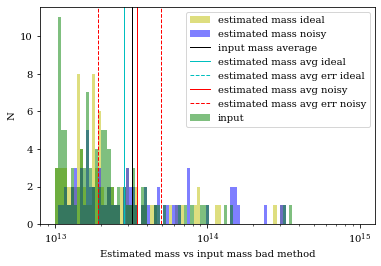

In [24]:
#input estimated masszdistrib
plt.hist(m_est_ideal_singlez, bins=np.logspace(13,15,100), facecolor='y', alpha=0.5, label="estimated mass ideal")
plt.hist(m_est_noisy_singlez, bins=np.logspace(13,15,100), facecolor='b', alpha=0.5, label="estimated mass noisy")
plt.axvline(cluster_data_mass_avg, color='k', linestyle='solid', linewidth=1 , label="input mass average")
plt.axvline(m_est_ideal_singlez_avg, color='c', linestyle='solid', linewidth=1, label="estimated mass avg ideal")
plt.axvline(m_est_ideal_singlez_avg-m_est_ideal_singlez_avg_err, color='c', linestyle='dashed', linewidth=1, label="estimated mass avg err ideal")
plt.axvline(m_est_ideal_singlez_avg+m_est_ideal_singlez_avg_err, color='c', linestyle='dashed', linewidth=1)
plt.axvline(m_est_noisy_singlez_avg, color='r', linestyle='solid', linewidth=1, label="estimated mass avg noisy")
plt.axvline(m_est_noisy_singlez_avg-m_est_noisy_singlez_avg_err, color='r', linestyle='dashed', linewidth=1, label="estimated mass avg err noisy")
plt.axvline(m_est_noisy_singlez_avg+m_est_noisy_singlez_avg_err, color='r', linestyle='dashed', linewidth=1)
plt.hist(cluster_data['m'],bins=np.logspace(13,15,100), facecolor='g', alpha=0.5 , label="input")
plt.xlabel('Estimated mass vs input mass bad method')
plt.legend(loc="upper right")
plt.gca().set_xscale("log")
plt.ylabel('N')
plt.show()


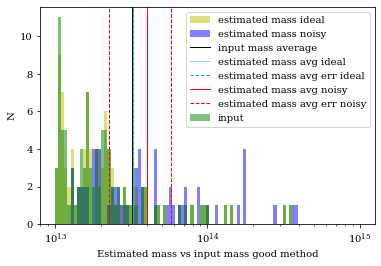

In [25]:
#input estimated masszdistrib
pyrand = np.random.normal(m_est_ideal_zdistrib
                        ,m_est_err_ideal_zdistrib)
plt.hist(m_est_ideal_zdistrib, bins=np.logspace(13,15,100),  facecolor='y', alpha=0.5, label="estimated mass ideal")
plt.hist(m_est_noisy_zdistrib, bins=np.logspace(13,15,100),  facecolor='b', alpha=0.5, label="estimated mass noisy")
plt.axvline(cluster_data_mass_avg, color='k', linestyle='solid', linewidth=1 , label="input mass average")
plt.axvline(m_est_ideal_zdistrib_avg, color='c',alpha=0.5, linestyle='solid', linewidth=1, label="estimated mass avg ideal")
plt.axvline(m_est_ideal_zdistrib_avg-m_est_ideal_zdistrib_avg_err, color='c', linestyle='dashed', linewidth=1, label="estimated mass avg err ideal")
plt.axvline(m_est_ideal_zdistrib_avg+m_est_ideal_zdistrib_avg_err, color='c', linestyle='dashed', linewidth=1)
plt.axvline(m_est_noisy_zdistrib_avg, color='r', linestyle='solid', linewidth=1, label="estimated mass avg noisy")
plt.axvline(m_est_noisy_zdistrib_avg-m_est_noisy_zdistrib_avg_err, color='r', linestyle='dashed', linewidth=1, label="estimated mass avg err noisy")
plt.axvline(m_est_noisy_zdistrib_avg+m_est_noisy_zdistrib_avg_err, color='r', linestyle='dashed', linewidth=1)
plt.hist(cluster_data['m'], bins=np.logspace(13,15,100), facecolor='g', alpha=0.5 , label="input")
plt.xlabel('Estimated mass vs input mass good method')
plt.xscale('log')
plt.legend(loc="upper right")
plt.ylabel('N')
plt.show()


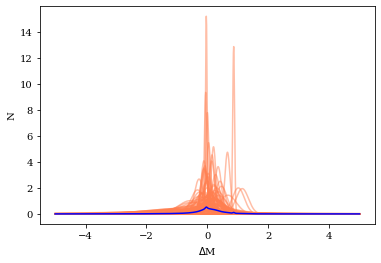

In [26]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
difference_noisy_singlez = np.log10(m_est_noisy_singlez)-np.log10(cluster_data['m'])
std_noisy_singlez = (1/np.log(10))*np.array(m_est_err_noisy_singlez)/np.array(m_est_noisy_singlez)
x_min=-5
x_max=5

x = np.linspace(x_min, x_max, 1000)
ysum_noisy_singlez = 0

for k in range(num):

    y_noisy_singlez = scipy.stats.norm.pdf(x,difference_noisy_singlez[k],std_noisy_singlez[k])
    ysum_noisy_singlez = ysum_noisy_singlez + y_noisy_singlez
    plt.plot(x,y_noisy_singlez, color='coral',alpha=0.5)


plt.plot(x,ysum_noisy_singlez/200, color='blue')
plt.xlabel('$\Delta$M')
plt.ylabel('N')
plt.show()


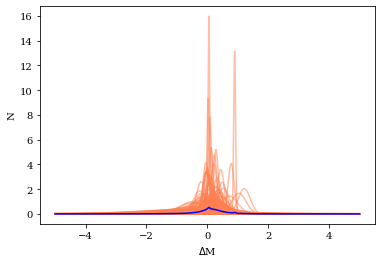

In [27]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
difference_noisy_zdistrib = np.log10(m_est_noisy_zdistrib)-np.log10(cluster_data['m'])
std_noisy_zdistrib = (1/np.log(10))*np.array(m_est_err_noisy_zdistrib)/np.array(m_est_noisy_zdistrib)
x_min=-5
x_max=5
x = np.linspace(x_min, x_max, 1000)
ysum_noisy_zdistrib = 0

for k in range(num):

    y_noisy_zdistrib = scipy.stats.norm.pdf(x,difference_noisy_zdistrib[k],std_noisy_zdistrib[k])
    ysum_noisy_zdistrib = ysum_noisy_zdistrib + y_noisy_zdistrib
    plt.plot(x,y_noisy_zdistrib, color='coral',alpha=0.5)
    
plt.plot(x,ysum_noisy_zdistrib/200, color='blue')
plt.xlabel('$\Delta$M')
plt.ylabel('N')
plt.show()


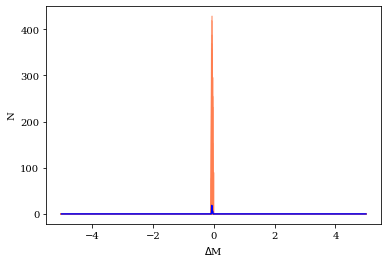

In [28]:
#unwichtig aber sachen werden berechnet
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
difference_ideal_singlez = np.log10(m_est_ideal_singlez)-np.log10(cluster_data['m'])
#print(difference)
std_ideal_singlez = (1/np.log(10))*np.array(m_est_err_ideal_singlez)/np.array(m_est_ideal_singlez)
#print(mean)
#print(std)
x_min=-5
x_max=5

x = np.linspace(x_min, x_max, 1000)
ysum_ideal_singlez = 0

for k in range(num):

    y_ideal_singlez = scipy.stats.norm.pdf(x,difference_ideal_singlez[k],std_ideal_singlez[k])
    #print(y[k])
    #print(mean[k])
    #print(std[k])
    ysum_ideal_singlez = ysum_ideal_singlez + y_ideal_singlez
    
    #plt.plot(x,y, color='coral')

   

    plt.plot(x,y_ideal_singlez, color='coral',alpha=0.5)
#print(ysum)

plt.plot(x,ysum_ideal_singlez/200, color='blue')
plt.xlabel('$\Delta$M')
plt.ylabel('N')

#plt.plot(y,z)

plt.show()
#print(mean)
#print(std)

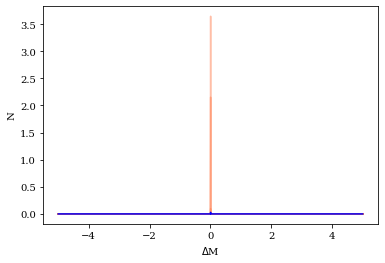

In [29]:
#unwichtig aber sachen werden berechnet
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
difference_ideal_zdistrib = np.log10(m_est_ideal_zdistrib)-np.log10(cluster_data['m'])
std_ideal_zdistrib = (1/np.log(10))*np.array(m_est_err_ideal_zdistrib)/np.array(m_est_ideal_zdistrib)
x_min=-5
x_max=5

x = np.linspace(x_min, x_max, 1000)
ysum_ideal_zdistrib = 0

for k in range(num):

    y_ideal_zdistrib = scipy.stats.norm.pdf(x,difference_ideal_zdistrib[k],std_ideal_zdistrib[k])
    ysum_ideal_zdistrib = ysum_ideal_zdistrib + y_ideal_zdistrib
    plt.plot(x,y_ideal_zdistrib, color='coral',alpha=0.5)
    
plt.plot(x,ysum_ideal_zdistrib/200, color='blue')
plt.xlabel('$\Delta$M')
plt.ylabel('N')
plt.show()


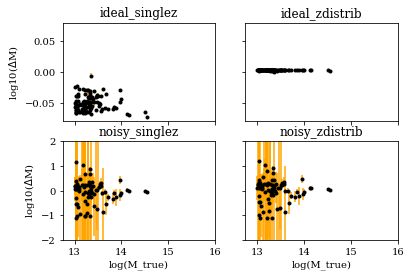

In [30]:
#alle methoden in einem Plot

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(np.log10(cluster_data['m']),difference_ideal_singlez, alpha = 0.5, s=0.1, marker=',')
axs[0, 0].set_title('ideal_singlez')
axs[0, 0].errorbar(np.log10(cluster_data['m']), difference_ideal_singlez, yerr=std_ideal_singlez, fmt='.', ecolor = 'orange',c='black')
axs[0, 0].set_xlim([12.75,16])
axs[0, 0].set_ylim([-0.08,0.08])


axs[1, 0].scatter(np.log10(cluster_data['m']),difference_noisy_singlez, alpha = 0.5, s=0.1, marker=',')
axs[1, 0].set_title('noisy_singlez')
axs[1, 0].errorbar(np.log10(cluster_data['m']), difference_noisy_singlez, yerr=std_noisy_singlez, fmt='.', ecolor = 'orange',c='black')
axs[1, 0].set_xlim([12.75,16])
axs[1, 0].set_ylim([-2,2])

axs[0, 1].scatter(np.log10(cluster_data['m']),difference_ideal_zdistrib, alpha = 0.5, s=0.1, marker=',')
axs[0, 1].set_title('ideal_zdistrib')
axs[0, 1].errorbar(np.log10(cluster_data['m']), difference_ideal_zdistrib, yerr=std_ideal_zdistrib, fmt='.', ecolor = 'orange',c='black')
axs[0, 1].set_xlim([12.75,16])
axs[0, 1].set_ylim([-0.08,0.08])

axs[1, 1].scatter(np.log10(cluster_data['m']),difference_noisy_zdistrib, alpha = 0.5, s=0.1, marker=',')
axs[1, 1].set_title('noisy_zdistrib')
axs[1, 1].errorbar(np.log10(cluster_data['m']), difference_noisy_zdistrib, yerr=std_noisy_zdistrib, fmt='.', ecolor = 'orange',c='black')
axs[1, 1].set_xlim([12.75,16])
axs[1, 1].set_ylim([-2,2])


for ax in axs.flat:
    ax.set(xlabel='log(M_true)', ylabel='log10($\Delta$M)')

#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

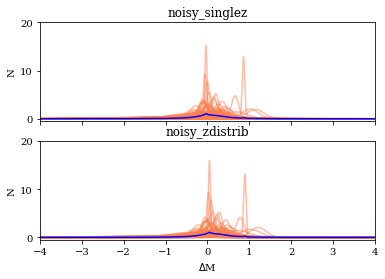

In [31]:
#alle methoden in einem Plot
ysum_ideal_singlez = 0
ysum_noisy_singlez = 0
ysum_ideal_zdistrib = 0
ysum_noisy_zdistrib = 0
fig, axs = plt.subplots(2,1)

for k in range(num):
    y_noisy_singlez = scipy.stats.norm.pdf(x,difference_noisy_singlez[k],std_noisy_singlez[k])
    ysum_noisy_singlez = ysum_noisy_singlez + y_noisy_singlez
    axs[0].plot(x,y_noisy_singlez, color='coral',alpha=0.5)

axs[0].plot(x,ysum_noisy_singlez/100, color='blue')
axs[0].set_title('noisy_singlez')
axs[0].set_xlim([-4,4])
axs[0].set_ylim([-0.5,20])


for k in range(num):
    y_noisy_zdistrib = scipy.stats.norm.pdf(x,difference_noisy_zdistrib[k],std_noisy_zdistrib[k])
    ysum_noisy_zdistrib = ysum_noisy_zdistrib + y_noisy_zdistrib
    axs[1].plot(x,y_noisy_zdistrib, color='coral',alpha=0.5)
    
axs[1].plot(x,ysum_noisy_zdistrib/100, color='blue')
axs[1].set_title('noisy_zdistrib')
axs[1].set_xlim([-4,4])
axs[1].set_ylim([-0.5,20])


for ax in axs.flat:
    ax.set(xlabel='$\Delta$M', ylabel='N')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [32]:
#compute the excess surface density
import clmm.theory as m
mass_Delta = 200
DeltaSigma = []
r3d = cl_ideal[0].profile['radius']
density_profile_parametrization = 'nfw'
for k in range(num):
    #r3d = np.logspace(0.2, 2, 15)
    cluster_mass = cluster_data['m'][k]
    cluster_concentration = cluster_data['c'][k]
    z_cl = cluster_data['z'][k]
    DeltaSigma.append(m.compute_excess_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization))

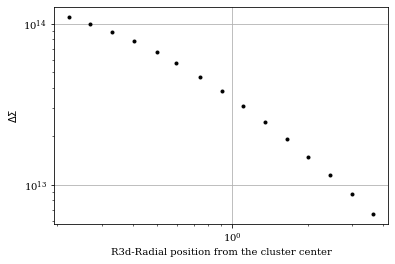

In [33]:
#Plot the excess Surface density against R
# Label für die y-Achse vergeben:
plt.ylabel('$\Delta\Sigma$')
plt.xlabel('R3d-Radial position from the cluster center')
# Einen x-y-Plot erstellen:
plt.plot(r3d, DeltaSigma[0],color='black', linestyle='', marker='.')

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([0, 5, 0, 20])
plt.xscale('log')
plt.yscale('log')
# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)


# Diagramm anzeigen:
plt.show()

In [34]:
#eval sigma_crit from gamma t
#delta_sigma= gamma_t * sigma_crit
import clmm.cosmology.ccl as tt
cosm=tt.CCLCosmology()
Sigmacrit=[]

for k in range(num):
    
    
    Sigmacrit.append(cosm.eval_sigma_crit(z_src=cl_ideal[k].profile['z'], z_len=cluster_data['z'][k]))
    
#delta sigma from gamma t
deltasigma_gt=cl_ideal[0].profile['gt']*Sigmacrit[0]



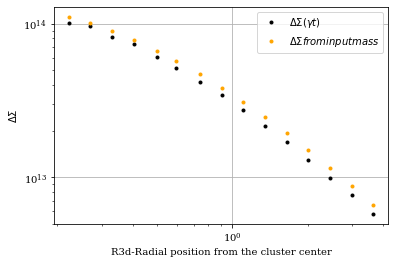

In [35]:


#Plot the excess Surface density against R
# Label für die y-Achse vergeben:
plt.ylabel('$\Delta\Sigma$')
plt.xlabel('R3d-Radial position from the cluster center')
# Einen x-y-Plot erstellen:
plt.plot(r3d, deltasigma_gt,color='black', linestyle='', marker='.', label="$\Delta\Sigma(\gamma t)$")
plt.plot(r3d, DeltaSigma[0],color='orange', linestyle='', marker='.', label="$\Delta\Sigma from input mass$")
# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
#plt.axis([0, 5, 0, 20])
plt.xscale('log')
plt.yscale('log')
# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)
plt.legend(loc="upper right")


# Diagramm anzeigen:
plt.show()

In [36]:
import sys
import os
import clmm
import clmm.dataops
from clmm.dataops import compute_tangential_and_cross_components, make_radial_profile, make_bins
from clmm.galaxycluster import GalaxyCluster
import clmm.utils as u
from clmm import Cosmology
from clmm.support import mock_data as mock
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)
import numpy as np
cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from numpy import random
import chainconsumer
import scipy
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from scipy.optimize import curve_fit



In [37]:
def excess_surface_density(single_catalog = None, radial_bin = None, sigma_c = None, radius = None):
    r"""
    Attributes:
    -----------
    
    single_catalog : GalaxyCluster object
    
    radial_bin : liste
        radial bins to evaluate the binned excess surface density
    
    sigma_c : string 
        column name in the single_catalog for the critical surface mass density
        
    Returns:
    --------
    
    ds, r, sum_weights : array, array, array
        the binned excess surface density, the binned radius, the sum of weights w_ls in each radial bin

    """
    #gammat radial bins
    #single_catalog.galcat['R']=radius
    #sigma_c = sigma_crit
    #single_catalog.galcat['et']=gt
    ds = np.zeros(len(radial_bin))
    rad = np.zeros(len(radial_bin))
    sum_weights = np.zeros(len(radial_bin))
    
    radius=single_catalog.profile['radius']
    
    for i, r_bin in enumerate(radial_bin):
        mask = (radius > r_bin[0])*(radius < r_bin[1])
        print(i)
        print(mask)
        if any(mask) : 
            w_ls = 1./np.array(sigma_c)[mask]**2
            ds[i] = np.average(np.array(single_catalog.profile['gt'][mask]*sigma_c[mask]), weights = w_ls)
            #
            rad[i] = np.average(radius[mask])
            sum_weights[i] = np.sum( w_ls )
    return ds, rad, sum_weights

In [38]:
print(cl_ideal[4].profile['radius'])

       radius      
-------------------
0.23103718667422285
 0.2648779660680942
 0.3325571197038046
 0.4066850966957163
 0.5036377460504903
 0.6093594201894083
 0.7421010139479451
 0.8930681688321311
 1.1009275333927253
 1.3490261002339208
 1.6455823450709701
  2.000701976579117
 2.4385550221697043
  2.981103099691271
  3.649384817656891


In [39]:

from clmm.galaxycluster import GalaxyCluster
new_bins = np.linspace(0.2, 4, 15)
radial_bin = [[new_bins[s],new_bins[s+1]] for s in range(len(new_bins)-1)]
names = ['ds_single', 'r_single', 'W_l','c', 'z', 'mass'] #liste
Stack_file_true = {name : [] for name in names} #dictonary 
Stack_file_photoz = {name : [] for name in names} #dictonary

n_catalogs = num
for i in range(n_catalogs):
    ds_single, r_single, sum_weights_single = excess_surface_density(single_catalog = cl_ideal[i], radial_bin = radial_bin, sigma_c = Sigmacrit[i]) #tuple unpacking
    #funktion gibt 3 sachen zurück
    data_to_store = [ds_single, r_single, sum_weights_single, cluster_data['c'][i], cluster_data['z'][i], cluster_data['m'][i]]
    #speichern der daten
    for d, name in enumerate(names):
        Stack_file_true[name].append(data_to_store[d])
    
    ds_single, r_single, sum_weights_single = excess_surface_density(single_catalog = cl_noisy[i], radial_bin = radial_bin, sigma_c = Sigmacrit[i])
    data_to_store = [ds_single, r_single, sum_weights_single, cluster_data['c'][i], cluster_data['z'][i], cluster_data['m'][i]]
    for d, name in enumerate(names):
        Stack_file_photoz[name].append(data_to_store[d])



0
[ True  True  True  True False False False False False False False False
 False False False]
1
[False False False False  True  True  True False False False False False
 False False False]
2
[False False False False False False False  True False False False False
 False False False]
3
[False False False False False False False False  True False False False
 False False False]
4
[False False False False False False False False False  True False False
 False False False]
5
[False False False False False False False False False False  True False
 False False False]
6
[False False False False False False False False False False False  True
 False False False]
7
[False False False False False False False False False False False False
 False False False]
8
[False False False False False False False False False False False False
  True False False]
9
[False False False False False False False False False False False False
 False False False]
10
[False False False False False False False Fals

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 15